In [125]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate

In [126]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int 
    sixes: int

    sr: float
    bpb: float #bpb = balls per boundary
    boundary_percentage: float

    summary: str
    llm_explanation:str


In [127]:
graph = StateGraph(BatsmanState)

In [128]:
def calculate_sr(state: BatsmanState) -> BatsmanState:
    
    balls = state["balls"]
    runs = state["runs"]
    
    sr = runs / balls * 100
    return {"sr": sr}
    # Strike rate = (runs/balls) * 100
    sr = runs / balls * 100 

    return {"sr": sr}

In [129]:
def calculate_bpb(state: BatsmanState) -> BatsmanState:
    
    fours = state["fours"]
    sixes = state["sixes"]
    balls = state["balls"]

    bpb = balls / (fours + sixes)
    return {"bpb": bpb}

    return {"bpb": bpb}

In [130]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    
    fours = state["fours"]
    sixes = state["sixes"]
    runs = state["runs"]

    boundary_percentage = (fours * 4 + sixes * 6) / runs * 100

    return {"boundary_percentage": boundary_percentage}

    return {"boundary_percentage": boundary_percentage}

In [131]:
def summary(state: BatsmanState) -> BatsmanState:

    summary_text = f"""
    Strike Rate: {state["sr"]:.2f},
    Balls per Boundary: {state["bpb"]:.2f},
    Boundary Percentage: {state["boundary_percentage"]:.2f}%
    """
    return {"summary": summary_text}
    summary_text = f"""
Strike Rate: {state["sr"]:.2f}
Balls per Boundary: {state["bpb"]:.2f}
Boundary Percentage: {state["boundary_percentage"]:.2f}%
"""
    
    return {"summary": summary_text}

In [132]:
def llm_explain(state: BatsmanState) -> BatsmanState:
    llm = OllamaLLM(model = "gemma3:1b")
    summary = state["summary"]
    prompt = PromptTemplate(
        template = "Use the given metric to say how did the batsman performed:{summary}",
        input_variables=["summary"]
    )
    response = llm(prompt.format(summary=summary))



    return {"llm_explanation": response}


In [133]:
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)
graph.add_node("llm_explain", llm_explain)



In [134]:
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")  
graph.add_edge("calculate_boundary_percentage", "summary")

graph.add_edge("summary", "llm_explain")

graph.add_edge("llm_explain", END)

In [135]:
workflow = graph.compile()

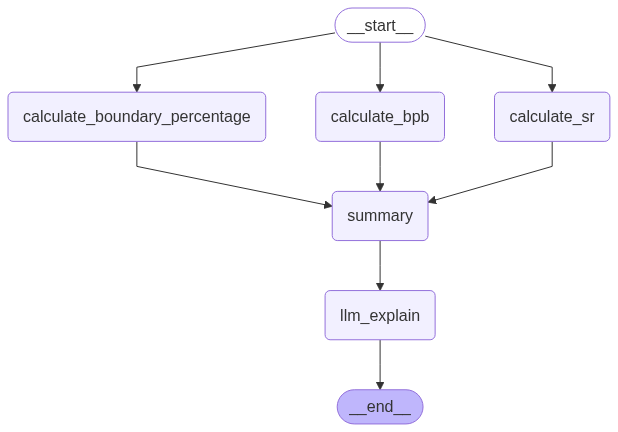

In [136]:
workflow

In [137]:
initial_state = {
    "runs": 85,
    "balls": 65,
    "fours": 8,
    "sixes": 2,
}

final_state = workflow.invoke(initial_state)

In [138]:
print(final_state["summary"])


    Strike Rate: 130.77,
    Balls per Boundary: 6.50,
    Boundary Percentage: 51.76%
    


In [139]:
print(final_state["llm_explanation"])

Okay, let's break down the batsman’s performance based on those metrics:

**Overall Performance Summary:**

The batsman is performing exceptionally well. They are a very strong batsman with a high strike rate and a significant contribution through boundaries.

**Here’s a more detailed breakdown:**

*   **Strike Rate (130.77):** This is a very high strike rate, indicating they are scoring runs quickly.
*   **Balls per Boundary (6.50):** This is a considerable number – it suggests they are consistently hitting boundaries, which is a key part of a good scoring performance.
*   **Boundary Percentage (51.76%):** This shows that they are hitting boundaries at a very high rate – 51.76% is a strong and impressive percentage.

**Conclusion:**

Based on these metrics, the batsman is a **highly valuable player** who is performing exceptionally well, contributing significantly to the team’s scoring.

**To give a more precise assessment, more context would be helpful, such as:**

*   **What format 